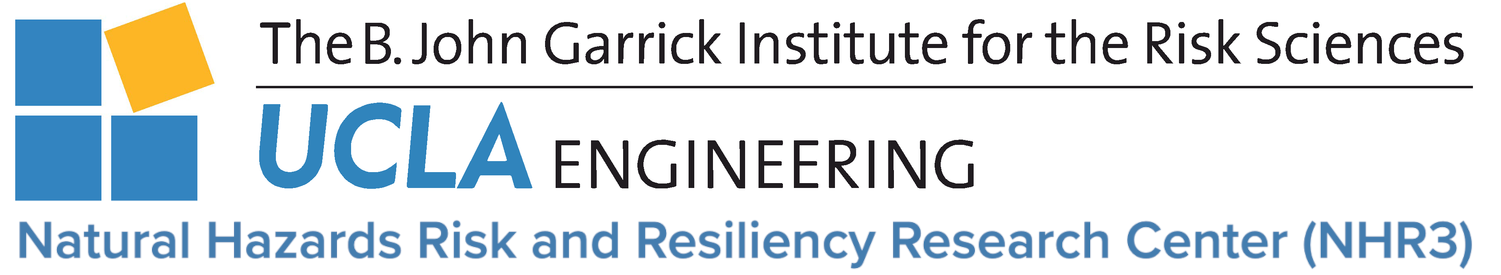


<center><h1>Notebook to Select Ground Motion Suites from NGA-West2 Database</h1></center>
<center>
    <div style="font-size: 18px;">
        <i>By: Mahdi Bahrampouri (mahdi.bahrampoury@yahoo.com), Meibai Li (ml47544@g.ucla.edu), Yousef Bozorgnia (yousefbozorgnia@g.ucla.edu), Esra Zengin (esrazengin@g.ucla.edu), and Yunbo Wang (wangyunbo0527@gmail.com)</i>
    </div>
</center>    
<center><i>Created: October 18th, 2023 | Last modified: February 12, 2024</i></center>

---

This notebook facilitates ground motion selection based on target response mean and standard deviation, utilizing records from the NGA-West2 Database (Ancheta et al. 2014). It comprises four main parts:

1. **Input Parameter Collection:** Users provide parameters for searching ground motions.
2. **Input File Generation:** Based on user inputs, an input JSON file is created and stored in the "Inputs" folder.
3. **Ground Motion Selection Execution:** The selection process is executed using the provided target and input parameters.
4. **Results Display and Comparison:** A table of selected ground motions is displayed, and the selected suite is plotted against the target.

**Please Note:** This tool does not constrain based on Vs30, fault mechanisms, or vertical motions.

---




### References

- Ancheta, T. D., et al. (2014) NGA-West2 database, Earthquake Spectra, 30(3), 989–1005.
- Bahrampouri, M., et al. (2024) GMS2: A computer tool for selecting and amplitude scaling of earthquake ground motion records, Report, GIRS, University of California, Los Angeles.

--- 

### Additional Instructions

- **Note:** This notebook is designed to be run in JupyterLab.
- **Run All Cells:** To execute the entire notebook and view all outputs, go to the menu above and select `Run` -> `Run All Cells`.
- **Fold Cells:** To fold or unfold the code or output cells, select the cell and the click on the blue cell bar on the left.


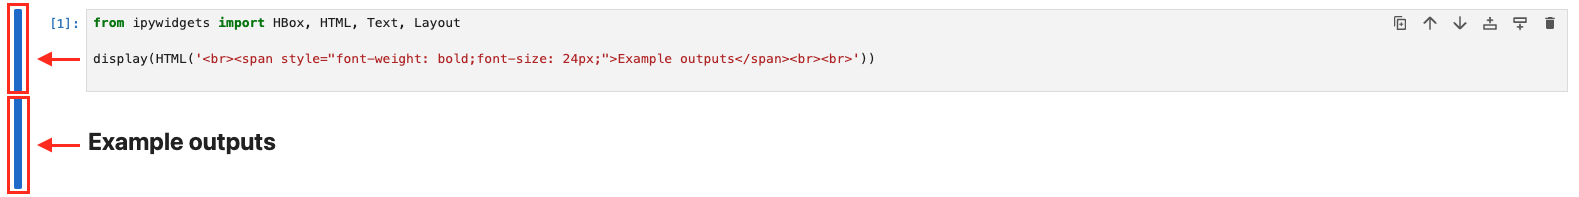

In [1]:
## Introduction
from IPython.display import Image, display, Markdown

# Display the banner image
display(Image(filename='./banner1.png', width=800))

# Improved Markdown content
markdown_content = """
<center><h1>Notebook to Select Ground Motion Suites from NGA-West2 Database</h1></center>
<center>
    <div style="font-size: 18px;">
        <i>By: Mahdi Bahrampouri (mahdi.bahrampoury@yahoo.com), Meibai Li (ml47544@g.ucla.edu), Yousef Bozorgnia (yousefbozorgnia@g.ucla.edu), Esra Zengin (esrazengin@g.ucla.edu), and Yunbo Wang (wangyunbo0527@gmail.com)</i>
    </div>
</center>    
<center><i>Created: October 18th, 2023 | Last modified: February 12, 2024</i></center>

---

This notebook facilitates ground motion selection based on target response mean and standard deviation, utilizing records from the NGA-West2 Database (Ancheta et al. 2014). It comprises four main parts:

1. **Input Parameter Collection:** Users provide parameters for searching ground motions.
2. **Input File Generation:** Based on user inputs, an input JSON file is created and stored in the "Inputs" folder.
3. **Ground Motion Selection Execution:** The selection process is executed using the provided target and input parameters.
4. **Results Display and Comparison:** A table of selected ground motions is displayed, and the selected suite is plotted against the target.

**Please Note:** This tool does not constrain based on Vs30, fault mechanisms, or vertical motions.

---




### References

- Ancheta, T. D., et al. (2014) NGA-West2 database, Earthquake Spectra, 30(3), 989–1005.
- Bahrampouri, M., et al. (2024) GMS2: A computer tool for selecting and amplitude scaling of earthquake ground motion records, Report, GIRS, University of California, Los Angeles.

--- 

### Additional Instructions

- **Note:** This notebook is designed to be run in JupyterLab.
- **Run All Cells:** To execute the entire notebook and view all outputs, go to the menu above and select `Run` -> `Run All Cells`.
- **Fold Cells:** To fold or unfold the code or output cells, select the cell and the click on the blue cell bar on the left.
"""

display(Markdown(markdown_content))
display(Image(filename='./fold_sidebar_highlight.png'))

In [2]:
## Main functions
# Import packages
import ipywidgets
from ipywidgets import *
from IPython.display import display, HTML
from utilities import *

## Ask user for input parameters
# Ask the user to put the target files into the "Inputs" folder
display(HTML('<br><span style="font-weight: bold;font-size: 24px;">Step 1: Insert input parameters</span><br><br>'))
display(HTML('<span style="font-weight: bold;font-size: 16px;">Please save the .csv files \
containing the target mean and SD in the \
folder: "Inputs" with the names of: "TargetSpectra_Elastic.csv" \
or "TargetSpectra_ductilityXX.csv".</span><br>'))
display(HTML('<span style="font-weight: bold;font-size: 16px;">Example target files \
are provided in the Inputs folder, please replace them with your own target files.</span><br><br>'))

# Ask the user for search parameters
output = ipywidgets.Output()
def run_gm_selectionFunc(b):
    with output:
        output.clear_output()
        clearOutputs()
        message = generateInput(Elastic_field, numGM_field,magnitude_field,rjb_field,
                      ScaleFactor_field,maxRecEvt_field,numPulse_field,minPulseT_field,
                      minDuration_field,ductility_checkList)
        display(HTML(f"<p style='font-size:20px'>{message}</p>"))
        if message == "":
            search_params, warning_list = read_search_parameters()
            run_gm_selection(search_params, warning_list)
def plot_selectionFunc(b):
    with output:
        output.clear_output()
        output_file_path = './Outputs/selected_motions.csv'
        search_params, warning_list = read_search_parameters()
        plot_selection(output_file_path, search_params)
            
output2 = ipywidgets.Output()

def get_user_password(b):
    with output2:
        output2.clear_output()
        username_inputted, password_inputted = get_username_password(user_name,password)
        download_file_backend(username_inputted, password_inputted)
       

[fileLoc_field,Elastic_field,numGM_field,magnitude_field,rjb_field,ScaleFactor_field,maxRecEvt_field,
            numPulse_field,minPulseT_field,minDuration_field,ductility_checkList,button_run_gm_selection,
            button_plot_selection,button_data_download,user_name,password] = setUpInputInterface()

buttons = [button_run_gm_selection,button_plot_selection,button_data_download]

for button in buttons:
    button.style.button_color = 'lightblue' 
    button.style.font_weight='bold'
    button.style.font_variant="DejaVu Sans"
    button.style.text_color='black'
    
button_run_gm_selection.on_click(run_gm_selectionFunc)
button_plot_selection.on_click(plot_selectionFunc)
button_data_download.on_click(get_user_password)
    
# box = VBox([fileLoc_field, Elastic_field, numGM_field, magnitude_field, rjb_field, ScaleFactor_field,maxRecEvt_field,
#         numPulse_field, minPulseT_field, minDuration_field,ductility_checkList, 
#             button_run_gm_selection, button_plot_selection,output])

box = VBox([fileLoc_field, Elastic_field, numGM_field, magnitude_field, rjb_field, ScaleFactor_field,maxRecEvt_field,
        numPulse_field, minPulseT_field, minDuration_field,ductility_checkList, 
            button_run_gm_selection, button_plot_selection,output])

display(box)
display(HTML('<br><span style="font-weight: bold;font-size: 24px;">Step 4 (Only for Chrome): Download the unscaled records from NGA-WEST2</span></br>'))
display(HTML('<span style="font-weight: bold;font-size: 16px;">Please type in your registered Email and password for the program to access the NGA-WEST2</span>'))
display(HTML('<span style="font-weight: bold;font-size: 16px;">Please go to the "Download" folder to check the downloaded .zip file.</span><br><br>'))


box2 = VBox([button_data_download])
display(box2)
display(HTML('<br>'))
box3 = VBox([user_name,password,output2])
display(box3)
